In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, ifft,fftshift
import control
import sympy as sp

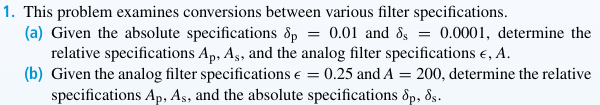

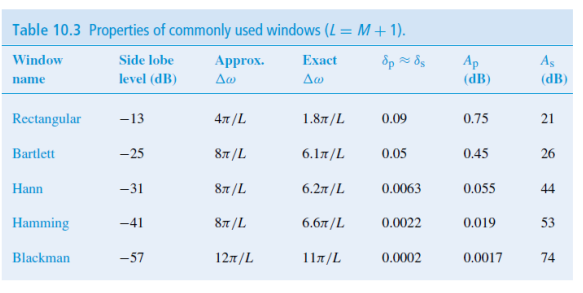

# a)

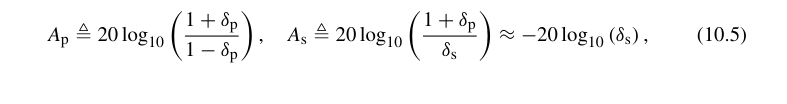

In [41]:
dp=0.01
ds=0.0001
Ap=20*np.log10((1+dp)/(1-dp))
As=20*np.log10((1+dp)/(ds))
Ap,As,-20*np.log10(ds)


(0.17372358370185242, 80.08642747565284, 80.0)

D.v.s  
$$A_p = 0.17 dB$$  
$$A_s = 80.1 dB$$

In [42]:
np.sqrt(10**(0.1*Ap)-1)

0.20202020202020185

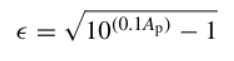

$$\epsilon =\sqrt{10^{0.1A_p}-1}=0.20$$

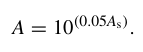

In [43]:
A=10**(0.05*As)
A

10099.99999999999

$$A=100100$$

# b)

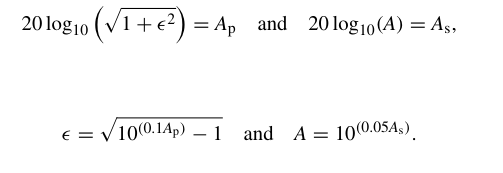

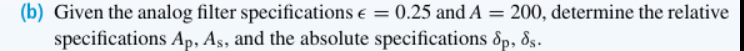

\begin{align*}
A=10^{0.05A_s}\\
log_{10}(A)=log_10(10^{0.05A_s})\\
log_{10}(A)=0.05A_s\\
A_s&=20log_{10}(A)\\
A_s&=20\cdot log{10}(200)
\end{align*}

In [44]:
20*np.log10(200)

46.020599913279625

$$A_s=46 dB$$

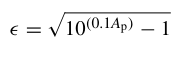

\begin{align*}
\epsilon &=\sqrt{10^{0.1A_p}-1}\\
10^{0.1A_p}-1&=\epsilon ^2\\
10^{0.1A_p}&=\epsilon ^2+1\\
10^{0.1A_p}&=\\
0.1A_p &=log_{10} (\epsilon ^2+1)\\
A_p &=10\cdot log_{10} (\epsilon ^2+1)\\
\end{align*}

In [45]:
eps=0.25
10*np.log10(0.25**2 +1)

0.2632893872234915

$$A_p=0.2633 dB$$

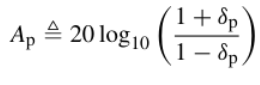

\begin{align*}
20log_{10}(\frac{1+\delta _p}{1-\delta _p})&=A_p\\
log_{10}(\frac{1+\delta _p}{1-\delta _p})&=1/20A_p\\
\frac{1+\delta _p}{1-\delta _p}&=10^{1/20A_p}\\
1+\delta _p&=10^{1/20A_p}(1-\delta _p)\\
1+\delta _p&=10^{1/20A_p}-\delta _p10^{1/20A_p}\\
1+\delta _p (1+10^{1/20A_p})&=10^{1/20A_p}\\
\delta _p (1+10^{1/20A_p})&=10^{1/20A_p}-1\\
\delta _p &=\frac{10^{1/20A_p}-1}{1+10^{1/20A_p}}\\
\end{align*}

In [46]:
Ap=10*np.log10(0.25**2 +1)
dp=(10**((1/20)*Ap)-1)/(1+10**((1/20)*Ap))
dp

0.015154995058715605

$$\delta _p =0.015$$

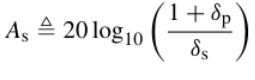

\begin{align*}
20log_{10}(\frac{1+\delta _p}{\delta _s})&=A_s\\
log_{10}(\frac{1+\delta _p}{\delta _s})&=1/20A_s\\
\frac{1+\delta _p}{\delta _s}&=10^{(1/20A_s)}\\
1+\delta _p&=10^{(1/20A_s)}\delta _s\\
10^{(1/20A_s)}\delta _s&=1+\delta _p\\
\delta _s&=\frac{1+\delta _p}{10^{(1/20A_s)}}\\
\end{align*}

In [47]:
dp=(10**((1/20)*Ap)-1)/(1+10**((1/20)*Ap))
As=20*np.log10(200)
ds=(1+dp)/(10**((1/20)*As))
ds

0.005075774975293577

$$\delta _s =0.005$$

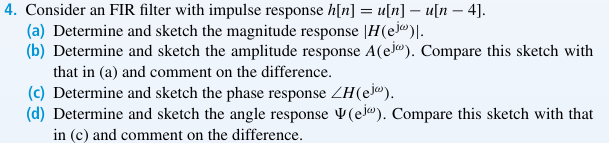

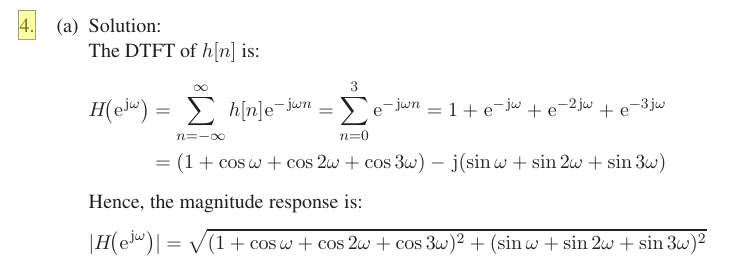

# a)

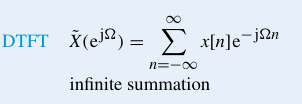

\begin{align*}
H(e^{jw})&=\sum _{n=-\infty} ^{\infty} h[n]e^{-jw}\\
H(e^{jw})&=\sum _{n=0} ^{3} e^{-jw}\\
H(e^{jw})&=1+e^{-jw}+e^{-2jw}+e^{-3jw}\\
\end{align*}

\begin{align*}
|H(e^{jw})|&=|1+e^{-jw}+e^{-2jw}+e^{-3jw}|\\
&=\sqrt{(1+cos(w)+cos(2w)+cos(3w))^2+(\sin(w)+\sin(2w)+\sin(3w))^2}
\end{align*}

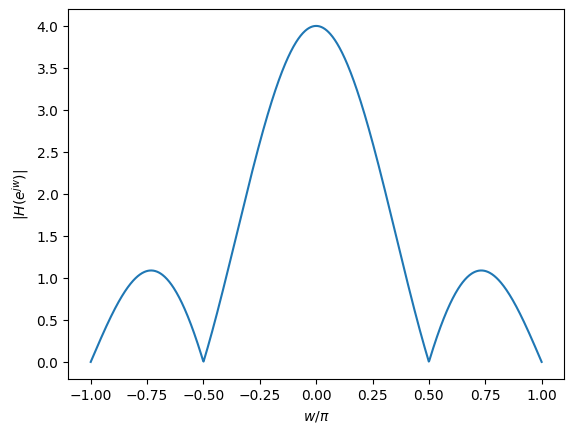

In [48]:
def H(omega):
    return 1+np.exp(-1j*omega)+np.exp(-2j*omega)+np.exp(-3j*omega)
o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o/np.pi,abs(H(o)))
plt.xlabel("$w/\pi$")
plt.ylabel("$|H(e^{jw})|$")
plt.show()


# b)

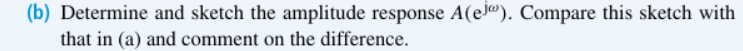

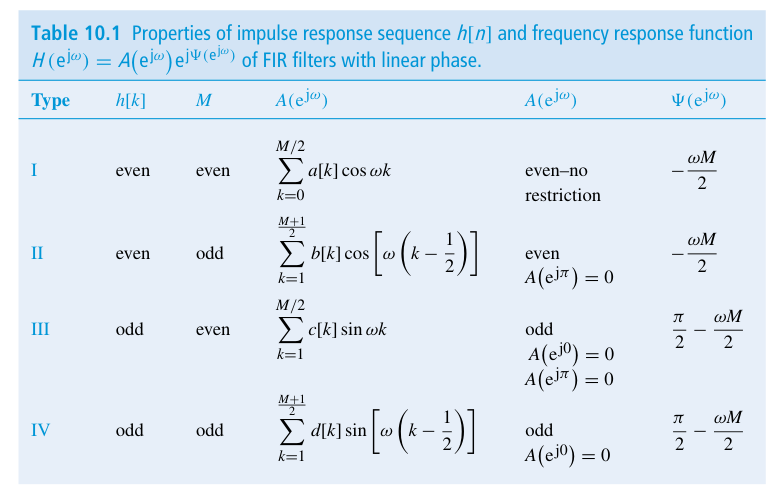

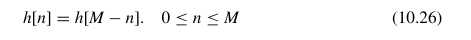

h[n] is symmetric per 10.26, but M=3 is odd meaning, this is a type II FIR filter

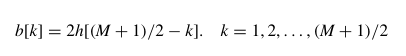

$$b[k]=2h[2-k]$$

\begin{align*}
A(e^{jw})&=\sum _{k=1} ^{2} b[k]cos(w(k-0.5))\\
&=b[1]cos(w(0.5))+b[2]cos(w(1.5))\\
&=2h[2-1]cos(w(0.5))+2h[2-2]cos(w(1.5))\\
&=2cos(w(0.5))+2cos(w(1.5))\\
\end{align*}

In [49]:
def h(n):
    return np.heaviside(n,1)-np.heaviside(n-4,1)
def b(k,M):
    return (2*h(((M+1)/2)-k))
def A(omega,M):
    sum=0
    for k in range(1,int(((M+1)/2)+1)):
        sum+=b(k,M)*np.cos(omega*(k-0.5))
    return sum


Text(0, 0.5, '$|H(e^{jw})|$ in red and $A(e^{jw})$ in blue')

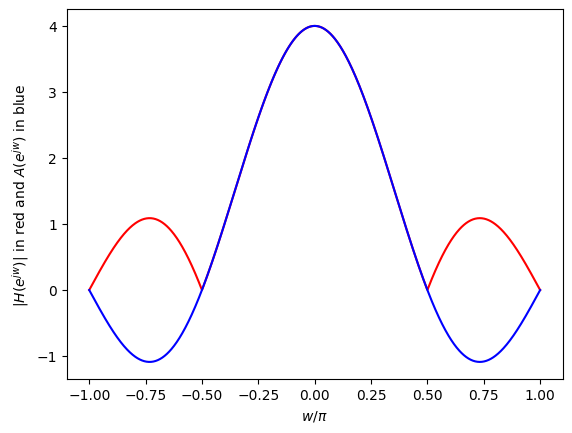

In [50]:
plt.plot(o/np.pi,abs(H(o)),'r')
plt.plot(o/np.pi,A(o,3),'b')


plt.xlabel("$w/\pi$")
plt.ylabel("$|H(e^{jw})|$ in red and $A(e^{jw})$ in blue")


# c)

\begin{align*}
H(e^{jw})&=1+e^{-jw}+e^{-2jw}+e^{-3jw}\\
&=(1+cos(w)+cos(2w)+cos(3w))-j(\sin(w)+\sin(2w)+\sin(3w))\\\\
\angle H(e^{jw})&=tan^{-1}(\frac{\sin(w)+\sin(2w)+\sin(3w)}{1+cos(w)+cos(2w)+cos(3w)})
\end{align*}

$$H(e^{jw})=\frac{1-e^{-4jw}}{1-e^{-jw}}$$

$$\angle H(e^{jw})=\tan ^-1(\frac{\frac{\sin(-4w)}{\sin(-w)}}{\frac{1-\cos(-4w)}{1-\cos(-w)}}) $$

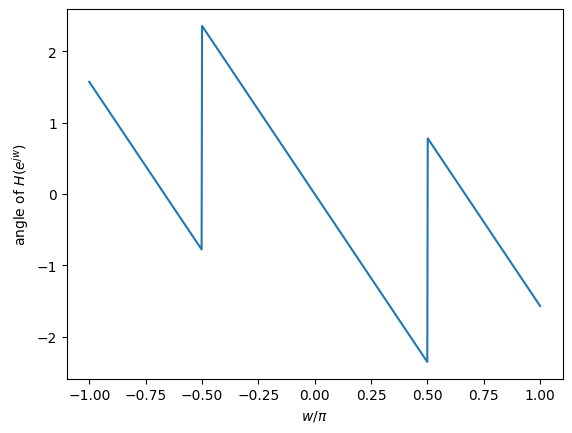

In [51]:
o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o/np.pi,np.angle(H(o)))
plt.xlabel("$w/\pi$")
plt.ylabel("angle of $H(e^{jw})$")
plt.show()

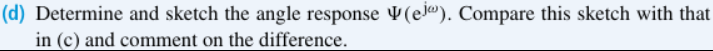

Fra table 10.1 kan man se at  
  
$$\psi (e^{jw})=-\frac{w\cdot M}{2}=-\frac{3w}{2}$$

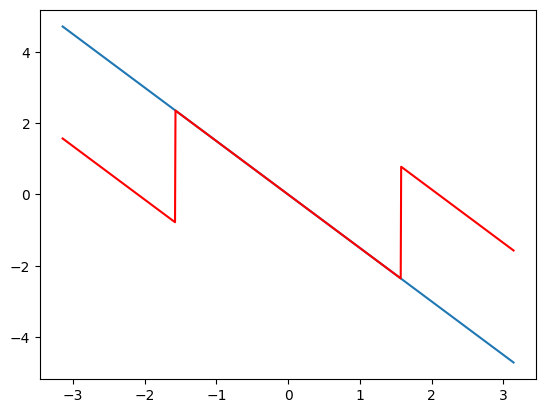

In [52]:
def psi(omega,M):
    return (-omega*M)/2
plt.plot(o,psi(o,3))
plt.plot(o,np.angle(H(o)),'r')


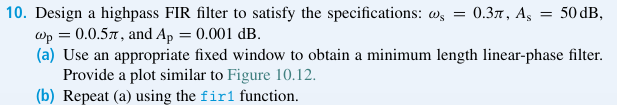

# (a)

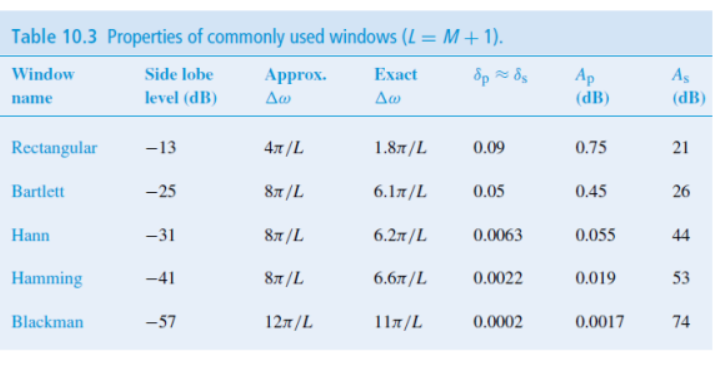

Since we want to design a highpass FIR filter, the type of the filter has to be I or IV, since $A(e^{j\pi})=0$ for type II and III

From the constraints it's apparent that $A_s$ is only met using a Hamming or Blackman window. However none of the windows can satisfy $A_p$, but the window closest to satisfying $A_s$ is the Blackman window

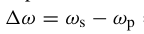

$$\Delta w = -0.5\pi$$

This can be used to choose the appropriate length

$$\Delta w =11\pi /L \implies L=\frac{11\pi}{\Delta w}=\frac{11}{0.5}=22$$

this gives $M=21$

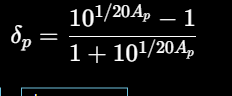

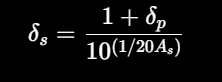

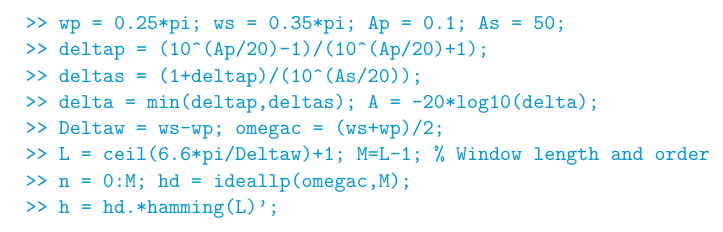

hd:

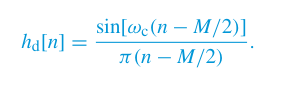

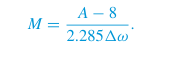

In [ ]:
signal.kais

In [89]:
signal.kaiserord(np.array([0.3,0.5]),np.array([0,1]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [82]:
(50-8)/(2.85*0.5)

29.473684210526315

C:\Users\simon\AppData\Local\Temp\ipykernel_10828\3158178836.py:15: RuntimeWarning: invalid value encountered in divide
  hd=(np.sin(np.pi*(n-(M/2))))/(np.pi*(n-(M/2)))-(np.sin(wc*(n-(M/2))))/(np.pi*(n-(M/2)))


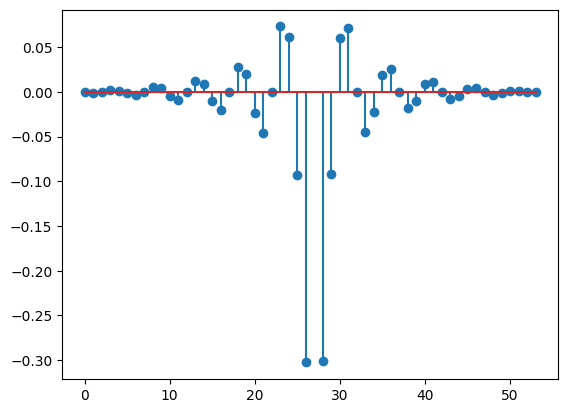

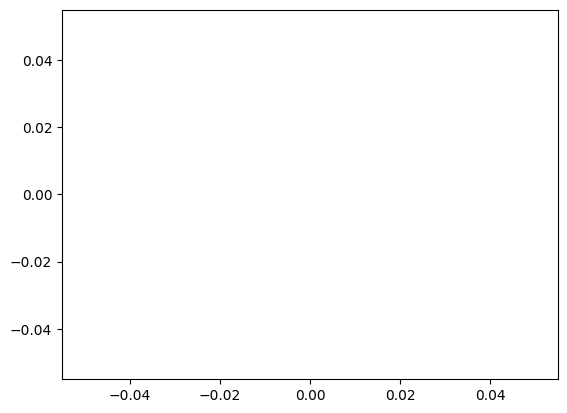

(5.756462726124071e-05, 0.0031624596955031827)

In [94]:
wp=0.5*np.pi
ws=0.3*np.pi
dw=ws-wp
As=50
Ap=0.001
dp=(10**((1/20)*Ap)-1)/(1+10**((1/20)*Ap))
ds=(1+dp)/(10**((1/20)*As))
d=min(dp,ds)
A=-20*np.log10(d)
wc=(ws+wp)/2
L=55
M=54
n=np.arange(0,M)
beta=0.5842*(50-21)**(0.4)+0.07886*(50-21)
hd=(np.sin(np.pi*(n-(M/2))))/(np.pi*(n-(M/2)))-(np.sin(wc*(n-(M/2))))/(np.pi*(n-(M/2)))
h=hd*signal.windows.kaiser(M,beta)
plt.stem(h)
plt.show()
def blackH(omega,imp_res):
    sum=0
    for i in range(0,len(imp_res)):
        sum+=h[i]*np.exp(-1j*omega*i)
    return sum
o=np.linspace(0,np.pi,1000)
plt.plot(o/np.pi,20*np.log10(abs(blackH(o,h))))
plt.show()
dp,ds

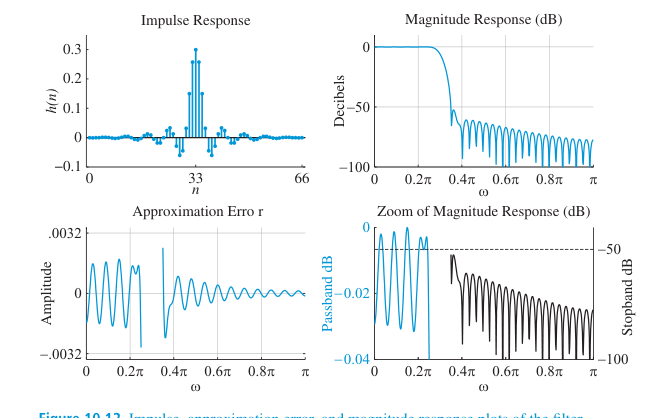

In [65]:
h2=signal.firwin(L)
plt.stem(h2)

TypeError: firwin() missing 1 required positional argument: 'cutoff'

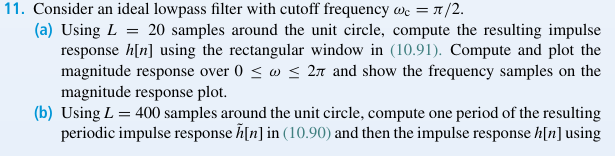
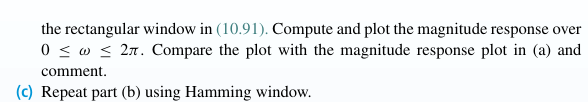

# a)

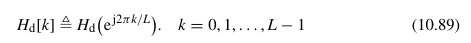

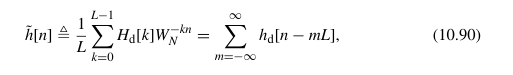

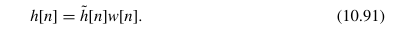

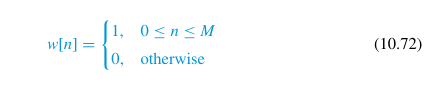

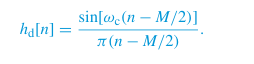

C:\Users\simon\AppData\Local\Temp\ipykernel_10828\1481107133.py:7: RuntimeWarning: invalid value encountered in divide
  return (np.sin(w_c*(n-(M/2))))/(np.pi*(n-(M/2)))


<StemContainer object of 3 artists>

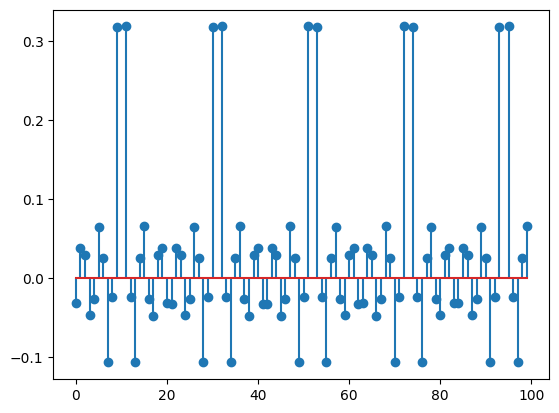

In [109]:
L=20
M=L-1
wc=np.pi/2
def w(n,M):
    return np.piecewise(n,[(0<=n)*(n<=M)],[1.,0])
def hd(n,M,w_c):
    return (np.sin(w_c*(n-(M/2))))/(np.pi*(n-(M/2)))
def h_tilde(n,M,w_c):
    sum=0
    for i in range(-100,100):
        sum+=hd(n-i*(M+1),M,w_c)
    return sum
def h(n,M,w_c):
    return h_tilde(n,M,w_c)*w(n,M)[0]
n_in=np.arange(0,100)
plt.stem(h(n_in,L,wc))

In [134]:
L=20
M=L-1
wc=np.pi/2
dw=2*np.pi/L
k1=int(np.floor(wc/dw))
print(k1)
Ad=np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1])
alpha=M/2
Q=np.floor(alpha)
print(Q)
psid=-alpha*2*np.pi/L*np.append(np.arange(0,Q),-(L-np.arange(Q+1,M)))
Hd=Ad*np.exp(1j*psid)
hd=np.real(ifft(Hd))
h=hd[L/2-9:L/2+10]*signal.windows.hamming(20)

5
9.0


ValueError: operands could not be broadcast together with shapes (21,) (18,) 

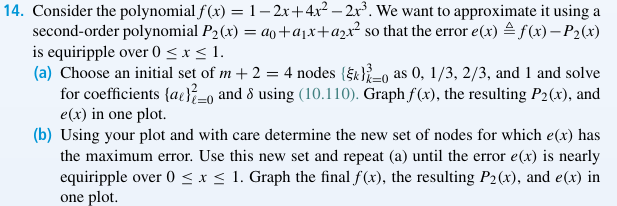

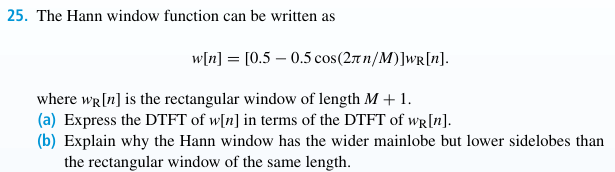

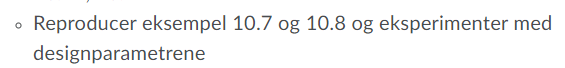